# Data Downloading

In [1]:
import yfinance as yf
import datetime
import pandas as pd

# Define the list of symbols
symbols = ['^GSPC', '^DJI', '^IXIC', '^FTSE', '^SSMI', '^STOXX50E']

# Set the end date
end_date = datetime.datetime(2023, 12, 1)

# Calculate the start date by subtracting 23 years from the end date
start_date = end_date - datetime.timedelta(days=23 * 365)

# Fetch historical data
dataIndice = yf.download(symbols, start=start_date, end=end_date)

# Combine the data for all symbols into a single DataFrame
indiceData = dataIndice['Close']

# Rename the columns to include the symbol
indiceData.columns = [f"{symbol}_Close" for symbol in symbols]

[*********************100%%**********************]  6 of 6 completed


## SPX/VIX Correlation

/var/folders/nz/_ym_zxk54ds3nx4s9gfqgfn40000gn/T/ipykernel_71923/735423210.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indiceData['Daily_Return'] = indiceData['^FTSE_Close'].pct_change()
/var/folders/nz/_ym_zxk54ds3nx4s9gfqgfn40000gn/T/ipykernel_71923/735423210.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indiceData['Realized_Log_Volatility'] = np.log(indiceData['^FTSE_Close']).diff().rolling(window=window_size).std()
/var/folders/nz/_ym_zxk54ds3nx4s9gfqgfn40000gn/T/ipykernel_71923/735423210

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


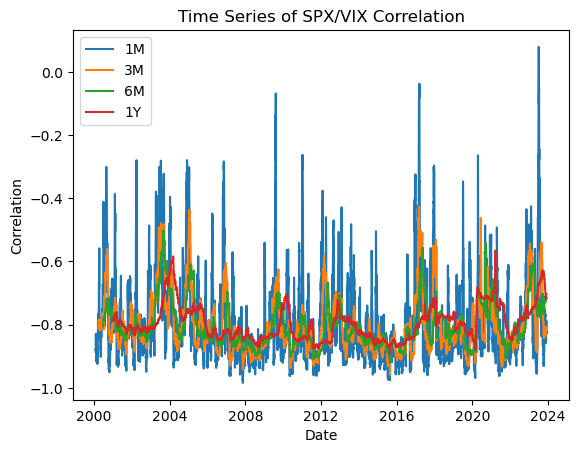

In [2]:
import yfinance as yf
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate daily returns
indiceData['Daily_Return'] = indiceData['^FTSE_Close'].pct_change()

# Set the window size for calculating realized variance (e.g., 20 days)
window_size = 20

# Calculate realized log-volatility using a rolling window
indiceData['Realized_Log_Volatility'] = np.log(indiceData['^FTSE_Close']).diff().rolling(window=window_size).std()

# Calculate the absolute return of the log-volatility
indiceData['Absolute_Return_Log_Volatility'] = np.abs(indiceData['Realized_Log_Volatility'].pct_change())

windowLst = [20, 60, 120, 252, 504, 1760, 2520]
nameLst3 = ["1M", "3M", "6M", "1Y", "2Y", "5Y", "10Y"]
normalScalar = [7, 3, 1.5, 0.8, .3, .055, .022]

# Function to fetch historical data
def get_historical_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Fetch historical data for SPX and VIX
start_date = '2000-01-01'
end_date = '2023-12-01'

spx_data = get_historical_data('^GSPC', start_date, end_date)  # SPX ticker
vix_data = get_historical_data('^VIX', start_date, end_date)    # VIX ticker

# Merge the dataframes on the 'Date' column
merged_data = pd.merge(spx_data['Close'], vix_data['Close'], on='Date', how='inner')
merged_data.columns = ['SPX', 'VIX']

# Calculate daily returns for SPX and VIX
merged_data['SPX_Returns'] = merged_data['SPX'].pct_change()
merged_data['VIX_Returns'] = merged_data['VIX'].pct_change()


for i,j in zip(windowLst[0:4], nameLst3[0:4]):
  merged_data['Correlation'] = merged_data['SPX_Returns'].rolling(window=i).corr(merged_data['VIX_Returns'])
  plt.plot(merged_data['Correlation'], label= j)

# Plot the time series of the correlation
#plt.plot(merged_data['Correlation'], label='SPX/VIX Correlation', color='blue')


plt.title('Time Series of SPX/VIX Correlation')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.show()


I have graphed the times series of the SPX/VIX correlation, with a rolling of 1 month, 3 months, 6 months, and 1 year. We see that the SPX/VIX is usually negatively correlated, which is reflected in the market. Since VIX is a measure of future volatility, so when the market falls, there's greater future volatility. If a market rises, usually it's assumed that future volatility is less.

## S&P500 Realized_Volatility

/var/folders/nz/_ym_zxk54ds3nx4s9gfqgfn40000gn/T/ipykernel_71923/440315179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indiceData['Daily_Return'] = indiceData['^GSPC_Close'].pct_change()
/var/folders/nz/_ym_zxk54ds3nx4s9gfqgfn40000gn/T/ipykernel_71923/440315179.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indiceData['Realized_Volatility'] = indiceData['Daily_Return'].rolling(window=window_size).mean()
/var/folders/nz/_ym_zxk54ds3nx4s9gfqgfn40000gn/T/ipykernel_71923/440315179.py:11: SettingWit

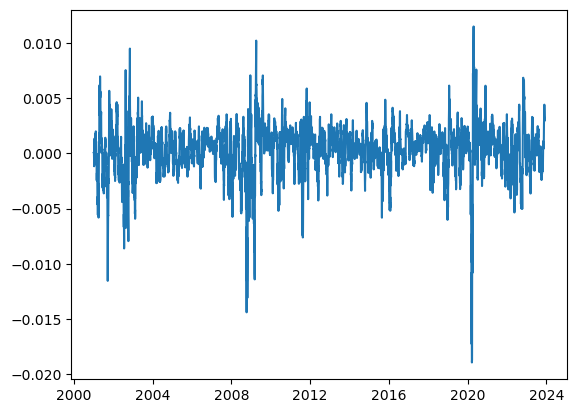

In [3]:
# Calculate daily returns
indiceData['Daily_Return'] = indiceData['^GSPC_Close'].pct_change()

# Set the window size for calculating realized volatility (e.g., 20 days)
window_size = 20

# Calculate realized volatility using a rolling window
indiceData['Realized_Volatility'] = indiceData['Daily_Return'].rolling(window=window_size).mean()

# Calculate realized variance using a rolling window
indiceData['Realized_Variance'] = indiceData['Daily_Return'].rolling(window=window_size).var() * window_size

# Plot the histogram of realized volatility
plt.plot(indiceData['Realized_Volatility'].dropna(), label = "SP 500 Realized Volatility 1mo")

indiceData['Realized_Volatility'] = indiceData['Daily_Return'].rolling(window=60).mean()

In [4]:
import numpy as np
indiceData['Realized_Volatility'] = indiceData['Daily_Return'].rolling(window=window_size).std() * np.sqrt(window_size)
indiceData.dropna()

/var/folders/nz/_ym_zxk54ds3nx4s9gfqgfn40000gn/T/ipykernel_71923/3933363827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indiceData['Realized_Volatility'] = indiceData['Daily_Return'].rolling(window=window_size).std() * np.sqrt(window_size)


,^GSPC_Close,^DJI_Close,^IXIC_Close,^FTSE_Close,^SSMI_Close,^STOXX50E_Close,Daily_Return,Realized_Log_Volatility,Absolute_Return_Log_Volatility,Realized_Volatility,Realized_Variance
Date,,,,,,,,,,,
2007-03-30,12354.349609,6308.000000,1420.859985,2421.639893,8977.000000,4181.029785,0.000453,0.009628,0.064532,0.033333,0.001111
2007-04-02,12382.299805,6315.500000,1424.550049,2422.260010,8956.299805,4189.549805,0.002262,0.009156,0.048948,0.032686,0.001068
2007-04-03,12510.299805,6366.100098,1437.770020,2450.330078,9054.000000,4246.299805,0.010337,0.008566,0.064535,0.031770,0.001009
2007-04-04,12530.049805,6364.700195,1439.369995,2458.689941,9057.599609,4261.830078,0.001579,0.008467,0.011545,0.031662,0.001002
2007-04-05,12560.200195,6397.299805,1443.760010,2471.340088,9099.099609,4271.540039,0.002406,0.008459,0.000962,0.031375,0.000984
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-16,34945.468750,7411.000000,4508.240234,14113.669922,10643.070312,4302.450195,-0.001307,0.012771,0.024574,0.036767,0.001352
2023-11-17,34947.281250,7504.299805,4514.020020,14125.480469,10737.370117,4340.770020,0.000052,0.012000,0.060328,0.035056,0.001229
2023-11-20,35151.039062,7496.399902,4547.379883,14284.530273,10740.269531,4342.410156,0.005830,0.012094,0.007770,0.034009,0.001157


In [5]:
vix_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,24.360001,26.150000,23.980000,24.209999,24.209999,0
2000-01-04,24.940001,27.180000,24.799999,27.010000,27.010000,0
2000-01-05,27.980000,29.000000,25.850000,26.410000,26.410000,0
2000-01-06,26.680000,26.709999,24.700001,25.730000,25.730000,0
2000-01-07,25.139999,25.170000,21.719999,21.719999,21.719999,0
...,...,...,...,...,...,...
2023-11-24,13.030000,13.170000,12.450000,12.460000,12.460000,0
2023-11-27,13.140000,13.280000,12.640000,12.690000,12.690000,0
2023-11-28,12.780000,14.300000,12.560000,12.690000,12.690000,0


In [6]:
data7 = pd.concat([vix_data, indiceData], axis = 1).dropna()
# Calculate daily returns
data7['Daily_Return SP 500'] = data7['^GSPC_Close'].pct_change()

# Set the window size for calculating realized volatility (e.g., 20 days)
window_size = 20

# Calculate realized volatility using a rolling window
data7['Realized_Volatility'] = data7['Daily_Return SP 500'].rolling(window=window_size).std() * np.sqrt(window_size)
data7

,Open,High,Low,Close,Adj Close,Volume,^GSPC_Close,^DJI_Close,^IXIC_Close,^FTSE_Close,^SSMI_Close,^STOXX50E_Close,Daily_Return,Realized_Log_Volatility,Absolute_Return_Log_Volatility,Realized_Volatility,Realized_Variance,Daily_Return SP 500
Date,,,,,,,,,,,,,,,,,,
2007-03-30,14.94,15.82,14.14,14.64,14.64,0.0,12354.349609,6308.000000,1420.859985,2421.639893,8977.000000,4181.029785,0.000453,0.009628,0.064532,NaN,0.001111,NaN
2007-04-02,14.91,15.46,14.40,14.53,14.53,0.0,12382.299805,6315.500000,1424.550049,2422.260010,8956.299805,4189.549805,0.002262,0.009156,0.048948,NaN,0.001068,0.002262
2007-04-03,14.02,14.06,12.81,13.46,13.46,0.0,12510.299805,6366.100098,1437.770020,2450.330078,9054.000000,4246.299805,0.010337,0.008566,0.064535,NaN,0.001009,0.010337
2007-04-04,13.82,13.91,13.20,13.24,13.24,0.0,12530.049805,6364.700195,1439.369995,2458.689941,9057.599609,4261.830078,0.001579,0.008467,0.011545,NaN,0.001002,0.001579
2007-04-05,13.57,13.66,12.69,13.23,13.23,0.0,12560.200195,6397.299805,1443.760010,2471.340088,9099.099609,4271.540039,0.002406,0.008459,0.000962,NaN,0.000984,0.002406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-16,14.12,14.42,13.68,14.32,14.32,0.0,34945.468750,7411.000000,4508.240234,14113.669922,10643.070312,4302.450195,-0.001307,0.012771,0.024574,0.036767,0.001352,-0.001307
2023-11-17,14.18,14.19,13.67,13.80,13.80,0.0,34947.281250,7504.299805,4514.020020,14125.480469,10737.370117,4340.770020,0.000052,0.012000,0.060328,0.035056,0.001229,0.000052
2023-11-20,14.26,14.31,13.39,13.41,13.41,0.0,35151.039062,7496.399902,4547.379883,14284.530273,10740.269531,4342.410156,0.005830,0.012094,0.007770,0.034009,0.001157,0.005830


In [7]:
data7.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '^GSPC_Close',
       '^DJI_Close', '^IXIC_Close', '^FTSE_Close', '^SSMI_Close',
       '^STOXX50E_Close', 'Daily_Return', 'Realized_Log_Volatility',
       'Absolute_Return_Log_Volatility', 'Realized_Volatility',
       'Realized_Variance', 'Daily_Return SP 500'],
      dtype='object')

In [8]:
cleanData7 = data7[["Close", "Realized_Volatility"]].dropna()
cleanData7

,Close,Realized_Volatility
Date,,
2007-05-02,13.08,0.023328
2007-05-03,13.09,0.023329
2007-05-04,12.91,0.022183
2007-05-08,13.21,0.022139
2007-05-10,13.60,0.024334
...,...,...
2023-11-16,14.32,0.036767
2023-11-17,13.80,0.035056
2023-11-20,13.41,0.034009


## VIX v.s. Realized Volatility

Text(0.5, 1.0, 'VIX VS Realized Volatility for 1M')

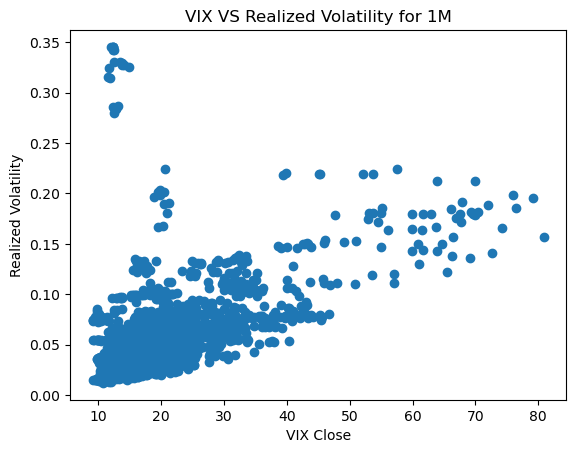

In [9]:
x7 = data7["Close"].iloc[0:-20]
y7 = data7["Realized_Volatility"].iloc[20:]
plt.scatter(x7, y7)
plt.xlabel("VIX Close")
plt.ylabel("Realized Volatility")
plt.title("VIX VS Realized Volatility for 1M")

For 1 month, we see that while it's pretty consistent in predicting what the realized volatility will do 1M into the future, there are a few points where the realized volatitliy has changed a lot from what it would be expected. If we exclude the cluster at the top left, it seems that you can graph a linear line of vix going from 10 to 70 and then the realized volatility increasing from 0 to about 0.175. However, that cluster at the top left is significantly higher than what a linear line would predict, and we would need to be careful of those situations if we had a model that depended on it.

Text(0.5, 1.0, 'VIX VS Realized Volatility for 3M')

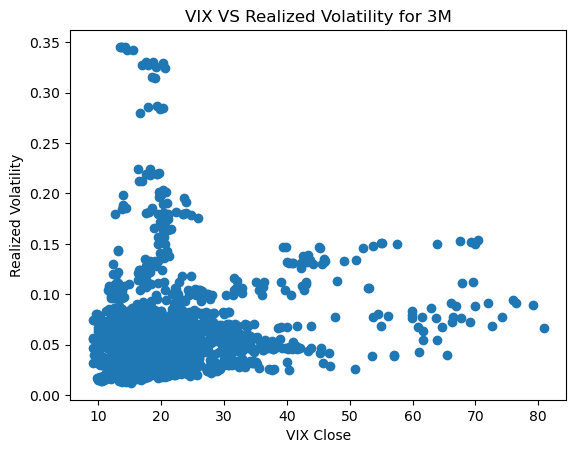

In [10]:
x7 = data7["Close"].iloc[0:-60]
y7 = data7["Realized_Volatility"].iloc[60:]
plt.scatter(x7, y7)
plt.xlabel("VIX Close")
plt.ylabel("Realized Volatility")
plt.title("VIX VS Realized Volatility for 3M")

When we use VIX vs Realized Volatility for the SPY, we see that the prediction becomes even worse - rather it seems that there are two distinct linear lines and predictions that can be drawn. Either the realized volatility falls between 0 to 0.10 as vix increases, or there's a second very distinct sharp line from a vix of 10 to 25, and a realized volatiltiy of 0 all the way to 0.35.

Text(0.5, 1.0, 'VIX VS Realized Volatility for 1Y')

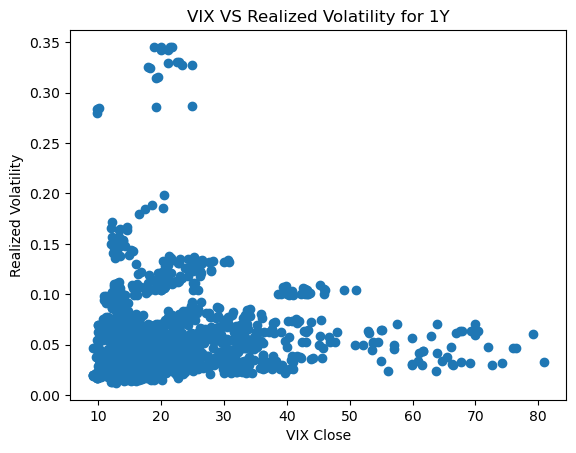

In [11]:
x7 = data7["Close"].iloc[0:-250]
y7 = data7["Realized_Volatility"].iloc[250:]
plt.scatter(x7, y7)
plt.xlabel("VIX Close")
plt.ylabel("Realized Volatility")
plt.title("VIX VS Realized Volatility for 1Y")

When we further increase the prediction period to 1 year out, it seems that the prediction deviates from linear, to almost a negative parabolic curve.

## VIX Plot - 5 Year

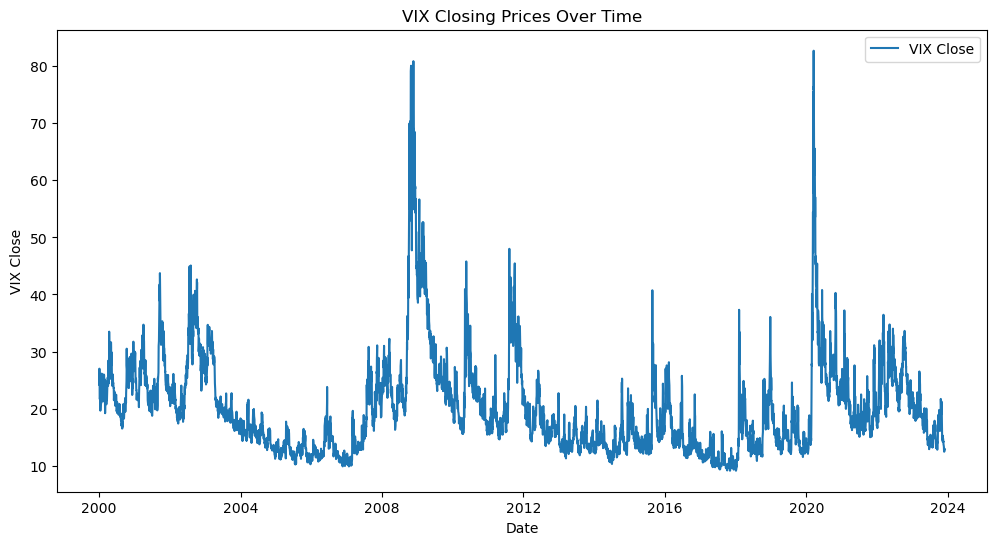

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(vix_data.index, vix_data['Close'], label='VIX Close')
plt.title('VIX Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('VIX Close')
plt.legend()
plt.show()

In [13]:
# Fetch historical data for SPX and VIX
start_date = '2000-01-01'
end_date = '2023-12-01'

sp500_data = get_historical_data('^GSPC', start_date, end_date)  # SPX ticker
vix_data = get_historical_data('^VIX', start_date, end_date)    # VIX ticker
import numpy as np

sp500_data['Log_Returns'] = np.log(sp500_data['Close'] / sp500_data['Close'].shift(1))
sp500_data = sp500_data.dropna()
sp500_data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Log_Returns
Date,,,,,,,
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-0.039099
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,0.001920
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,0.000955
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,0.026730
2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1457.599976,1064800000,0.011128
...,...,...,...,...,...,...,...
2023-11-24,4555.839844,4560.310059,4552.799805,4559.339844,4559.339844,1639500000,0.000597
2023-11-27,4554.859863,4560.520020,4546.319824,4550.430176,4550.430176,3403990000,-0.001956
2023-11-28,4545.549805,4568.140137,4540.509766,4554.890137,4554.890137,3586240000,0.000980


In [14]:
vix_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,24.360001,26.150000,23.980000,24.209999,24.209999,0
2000-01-04,24.940001,27.180000,24.799999,27.010000,27.010000,0
2000-01-05,27.980000,29.000000,25.850000,26.410000,26.410000,0
2000-01-06,26.680000,26.709999,24.700001,25.730000,25.730000,0
2000-01-07,25.139999,25.170000,21.719999,21.719999,21.719999,0
...,...,...,...,...,...,...
2023-11-24,13.030000,13.170000,12.450000,12.460000,12.460000,0
2023-11-27,13.140000,13.280000,12.640000,12.690000,12.690000,0
2023-11-28,12.780000,14.300000,12.560000,12.690000,12.690000,0


## GARCH Volatility

In [15]:
import pandas as pd
from arch import arch_model

garch_model = arch_model(sp500_data['Log_Returns'], vol='Garch', p=4, q=2)
garch_result = garch_model.fit(update_freq=5)
print(garch_result.summary())

Iteration:      5,   Func. Count:     84,   Neg. LLF: -19350.87991099943
Optimization terminated successfully    (Exit mode 0)
            Current function value: -19350.879909445415
            Iterations: 9
            Function evaluations: 84
            Gradient evaluations: 5
                     Constant Mean - GARCH Model Results                      
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                19350.9
Distribution:                  Normal   AIC:                          -38685.8
Method:            Maximum Likelihood   BIC:                          -38632.1
                                        No. Observations:                 6016
Date:                Sun, Dec 24 2023   Df Residuals:                     6015
Time:                        15:56:48   Df Model:                            1
       

/Users/Eric/opt/anaconda3/envs/dsm/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001536. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


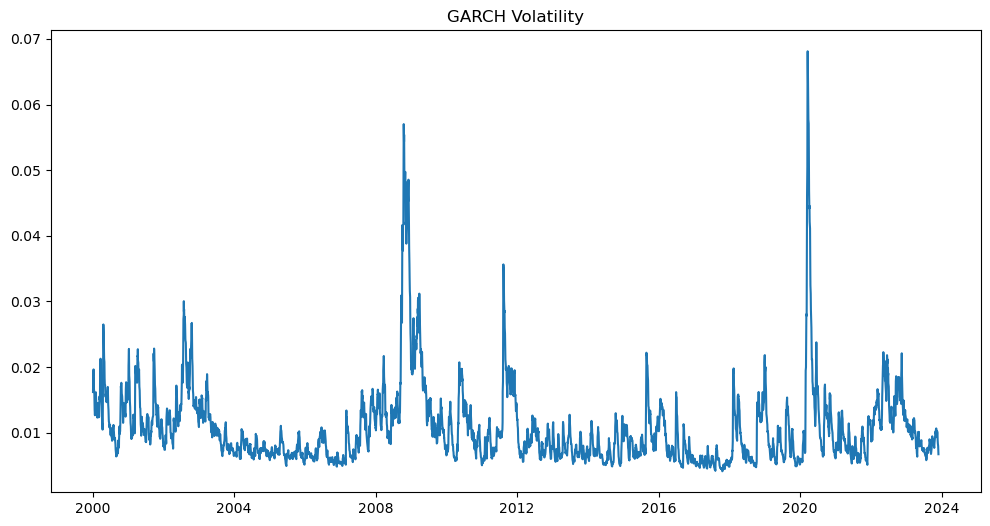

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# Plot VIX closing prices
plt.plot(garch_result.conditional_volatility)
plt.title('GARCH Volatility')
plt.show()

## EGARCH Volatility

/Users/Eric/opt/anaconda3/envs/dsm/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001536. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      5,   Func. Count:     98,   Neg. LLF: 14332256548.174002
Iteration:     10,   Func. Count:    189,   Neg. LLF: 1721507839.8754764
Iteration:     15,   Func. Count:    273,   Neg. LLF: -19346.00347124847
Iteration:     20,   Func. Count:    352,   Neg. LLF: -19355.351899650967
Iteration:     25,   Func. Count:    428,   Neg. LLF: -19356.35705156535
Iteration:     30,   Func. Count:    503,   Neg. LLF: -19356.36640879394
Optimization terminated successfully    (Exit mode 0)
            Current function value: -19356.366412582945
            Iterations: 32
            Function evaluations: 532
            Gradient evaluations: 32
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                19356.4
Distribution:                  No

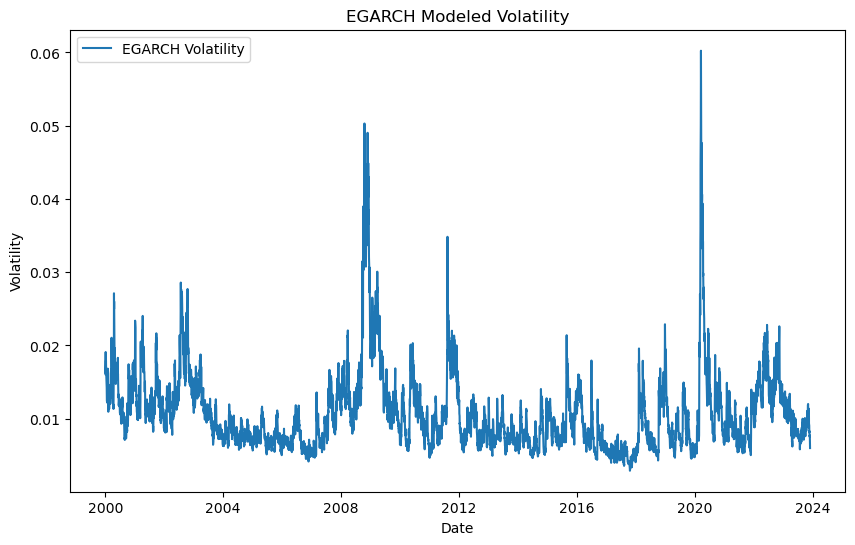

In [17]:
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

# You can adjust p and q parameters as needed
egarch_model = arch_model(sp500_data['Log_Returns'], vol='EGARCH', p=8, q=4)
egarch_result = egarch_model.fit(update_freq=5)

# Print the summary of the model's results
print(egarch_result.summary())

# Forecasting the next day's volatility
forecast = egarch_result.forecast(horizon=1)
print(forecast.variance[-1:])

# Plotting the conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(egarch_result.conditional_volatility, label='EGARCH Volatility')
plt.title('EGARCH Modeled Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

## TGARCH Volatility

Iteration:      5,   Func. Count:     78,   Neg. LLF: 55660.486332236236
Iteration:     10,   Func. Count:    139,   Neg. LLF: -14286.345515697847


/Users/Eric/opt/anaconda3/envs/dsm/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001536. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:     15,   Func. Count:    200,   Neg. LLF: -19504.07567167245
Iteration:     20,   Func. Count:    258,   Neg. LLF: -19515.371113690737
Iteration:     25,   Func. Count:    313,   Neg. LLF: -19515.460952990405
Iteration:     30,   Func. Count:    369,   Neg. LLF: -19515.461541679506
Optimization terminated successfully    (Exit mode 0)
            Current function value: -19515.461542100893
            Iterations: 32
            Function evaluations: 389
            Gradient evaluations: 31
                  Constant Mean - TARCH/ZARCH Model Results                   
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:                19515.5
Distribution:                  Normal   AIC:                          -39010.9
Method:            Maximum Likelihood   BIC:                          -38943.9
                   

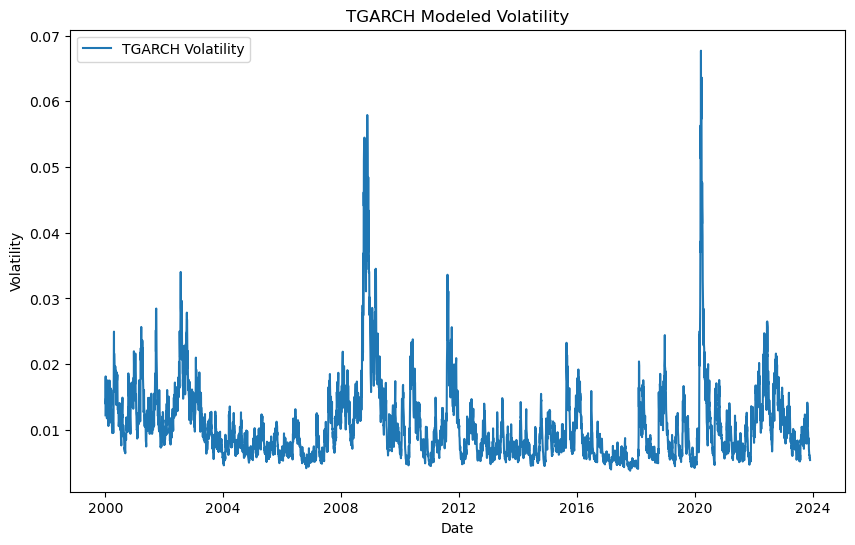

In [18]:
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

# Assuming sp500_data is your DataFrame and it has a column named 'Returns'

# Fit a TGARCH(1,1) model
# You might need to adjust the 'o' parameter based on your data
tgarch_model = arch_model(sp500_data['Log_Returns'], vol='Garch', p=1, o=4, q=3, power=1.0)
tgarch_result = tgarch_model.fit(update_freq=5)

# Print the summary of the model's results
print(tgarch_result.summary())

# Forecasting the next day's volatility
forecast = tgarch_result.forecast(horizon=1)
print(forecast.variance[-1:])

# Plotting the conditional volatility
plt.figure(figsize=(12, 6))
plt.plot(tgarch_result.conditional_volatility, label='TGARCH Volatility')
plt.title('TGARCH Modeled Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


## IGARCH

                     Constant Mean - GARCH Model Results                      
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                19341.9
Distribution:                  Normal   AIC:                          -38675.8
Method:            Maximum Likelihood   BIC:                          -38649.0
                                        No. Observations:                 6016
Date:                Sun, Dec 24 2023   Df Residuals:                     6015
Time:                        15:56:49   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         5.6659e-04  7.483e-06     75.715      0.000 [5.

/Users/Eric/opt/anaconda3/envs/dsm/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001536. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


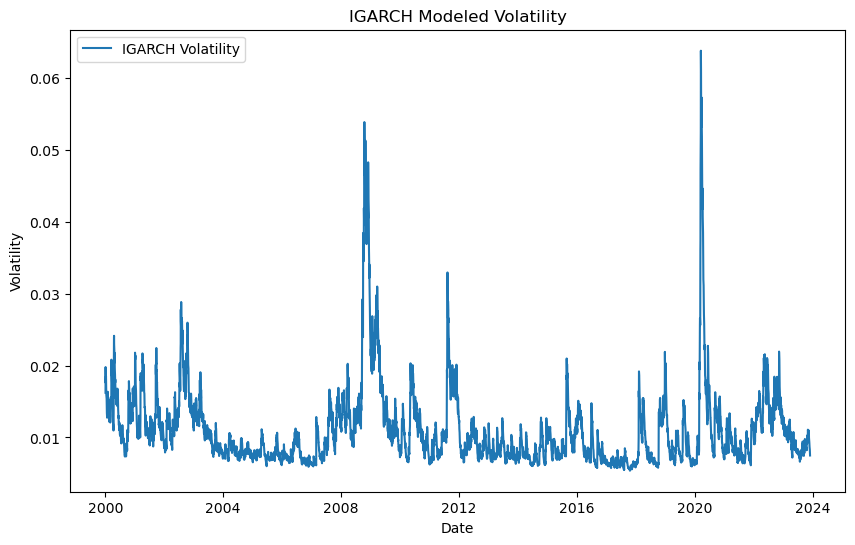

In [19]:
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

# Assuming sp500_data is your DataFrame and it has a column named 'Returns'

# Fit an IGARCH(1,1) model
# IGARCH is essentially a GARCH model with certain parameter constraints
# Specifically, the sum of alpha (arch_param) and beta (garch_param) is set to 1
igarch_model = arch_model(sp500_data['Log_Returns'], vol='Garch', p=1, q=1)
igarch_result = igarch_model.fit(update_freq=5, disp='off')

# Manually enforcing the IGARCH condition (alpha + beta = 1)
igarch_result.params['beta[1]'] = 1 - igarch_result.params['alpha[1]']

# Print the summary of the model's results
print(igarch_result.summary())

# Forecasting the next day's volatility
forecast = igarch_result.forecast(horizon=1)
print(forecast.variance[-1:])

# Plotting the conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(igarch_result.conditional_volatility, label='IGARCH Volatility')
plt.title('IGARCH Modeled Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

## Model Selection - MLE Parameter Estimation

In [20]:
# Fetch historical data for SPX and VIX
start_date = '2000-01-01'
end_date = '2023-12-01'

sp500_data = get_historical_data('^GSPC', start_date, end_date)  # SPX ticker
vix_data = get_historical_data('^VIX', start_date, end_date)    # VIX ticker
import numpy as np

sp500_data['Log_Returns'] = np.log(sp500_data['Close'] / sp500_data['Close'].shift(1))
sp500_data = sp500_data.dropna()
sp500_data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Log_Returns
Date,,,,,,,
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-0.039099
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,0.001920
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,0.000955
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,0.026730
2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1457.599976,1064800000,0.011128
...,...,...,...,...,...,...,...
2023-11-24,4555.839844,4560.310059,4552.799805,4559.339844,4559.339844,1639500000,0.000597
2023-11-27,4554.859863,4560.520020,4546.319824,4550.430176,4550.430176,3403990000,-0.001956
2023-11-28,4545.549805,4568.140137,4540.509766,4554.890137,4554.890137,3586240000,0.000980


In [22]:
# Splitting the data into train, validation, and test sets
train_size = int(len(sp500_data) * 0.6)
valid_size = int(len(sp500_data) * 0.2)
train_data = sp500_data['Log_Returns'][:train_size]
validation_data = sp500_data['Log_Returns'][train_size:train_size + valid_size]
test_data = sp500_data['Log_Returns'][train_size + valid_size:]

In [23]:
import pandas as pd
import numpy as np
from arch import arch_model
from sklearn.metrics import mean_squared_error
from itertools import product

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to estimate the best parameters for GARCH, EGARCH, TGARCH
def estimate_best_params(data, model_type='Garch', max_p=10, max_q=5, max_o=5, scale_factor=100):
    best_aic = np.inf
    best_params = None
    data_scaled = data * scale_factor

    for p, q in product(range(1, max_p + 1), range(1, max_q + 1)):
        for o in (range(max_o + 1) if model_type == 'TGARCH' else [0]):
            try:
                if model_type in ['Garch', 'TGARCH']:
                    model = arch_model(data_scaled, vol=model_type, p=p, o=o, q=q)
                elif model_type == 'EGARCH':
                    model = arch_model(data_scaled, vol=model_type, p=p, q=q)

                model_fit = model.fit(disp='off')
                aic = model_fit.aic
                if aic < best_aic:
                    best_aic = aic
                    best_params = (p, o, q)
            except:
                continue

    return best_params

def estimate_best_params_TG(data, model_type='Garch', max_p=5, max_q=5, max_o=5, scale_factor=100):
    best_aic = np.inf
    best_params = None
    data_scaled = data * scale_factor

    for p, q in product(range(1, max_p + 1), range(1, max_q + 1)):
        if model_type == 'TGARCH':
            for o in range(1, max_o + 1):  # Ensure o starts from 1 for TGARCH
                try:
                    model = arch_model(data_scaled, mean='Zero', vol='Garch', p=p, o=o, q=q)  # Specify vol='Garch'
                    model_fit = model.fit(disp='off')
                    aic = model_fit.aic
                    if aic < best_aic:
                        best_aic = aic
                        best_params = (p, o, q)
                except:
                    continue
        else:
            return None

    return best_params


# Function to estimate the best parameters for IGARCH
def estimate_best_params_igarch(data, max_p=20, scale_factor=100):
    best_aic = np.inf
    best_params = None
    data_scaled = data * scale_factor

    for p in range(1, max_p + 1):
        try:
            model = arch_model(data_scaled, vol='Garch', p=p, q=0)  # q is set to 0 for IGARCH
            model_fit = model.fit(disp='off')
            # Setting IGARCH parameters (sum of alpha and beta equals 1)
            model_fit.params['beta[1]'] = 1 - model_fit.params['alpha[1]']
            aic = model_fit.aic
            if aic < best_aic:
                best_aic = aic
                best_params = p
        except:
            continue

    return best_params

# Function to perform forecasting
def forecast(model_func, train_data, test_data, scale_factor=100):
    train_data_scaled = train_data * scale_factor
    model = model_func(train_data_scaled)
    model_fit = model.fit(disp='off')
    forecasts = model_fit.forecast(horizon=len(test_data)).variance.values[-1, :]
    return forecasts / (scale_factor ** 2)

# Define model functions
def garch_model(data, p, q):
    return arch_model(data, vol='Garch', p=p, q=q)

def egarch_model(data, p, q):
    return arch_model(data, vol='EGARCH', p=p, q=q)

def tgarch_model(data, p, o, q):
    return arch_model(data, vol='Garch', p=p, o=o, q=q)

# Define IGARCH model function
def igarch_model(data, p):
    model = arch_model(data, vol='Garch', p=p, q=0)
    # Manually setting IGARCH parameters
    model_fit = model.fit(disp='off')
    model_fit.params['beta[1]'] = 1 - model_fit.params['alpha[1]']
    return model

# Parameter tuning using validation set
scale_factor = 100  # Adjust as needed
best_params_garch = estimate_best_params(validation_data, model_type='Garch', scale_factor=scale_factor)
best_params_egarch = estimate_best_params(validation_data, model_type='EGARCH', scale_factor=scale_factor)
best_params_tgarch = estimate_best_params_TG(validation_data, model_type='TGARCH', max_o=5, scale_factor=scale_factor)
best_p_igarch = estimate_best_params_igarch(validation_data, scale_factor=scale_factor)

# Print the best parameters for each model
print("GARCH Best Params:", best_params_garch)
print("EGARCH Best Params:", best_params_egarch)
print("TGARCH Best Params:", best_params_tgarch)
print("IGARCH Best Params:", best_p_igarch)

# Function to perform rolling forecast
def rolling_forecast(model_func, train_data, test_data, scale_factor=100):
    forecasts = []
    train_data_scaled = train_data * scale_factor
    for t in range(len(test_data)):
        current_train_data = pd.concat([train_data_scaled, test_data.iloc[:t] * scale_factor])
        model = model_func(current_train_data)
        model_fit = model.fit(disp='off')
        fcast = model_fit.forecast(horizon=1).variance.values[-1, 0]
        forecasts.append(fcast / (scale_factor ** 2))  # Rescale back to original scale
    return np.array(forecasts)

# Function to perform rolling forecast and calculate RMSE, AIC, BIC
def rolling_forecast_and_metrics(model_func, train_data, test_data, scale_factor=100):
    rmse, aic, bic = None, None, None
    forecasts = []
    train_data_scaled = train_data * scale_factor

    for t in range(len(test_data)):
        current_train_data = pd.concat([train_data_scaled, test_data.iloc[:t] * scale_factor])
        model = model_func(current_train_data)
        model_fit = model.fit(disp='off')
        fcast = model_fit.forecast(horizon=1).variance.values[-1, 0]
        forecasts.append(fcast / (scale_factor ** 2))

        # Update RMSE, AIC, BIC only for the last iteration
        if t == len(test_data) - 1:
            rmse = calculate_rmse(test_data, np.array(forecasts))
            aic = model_fit.aic
            bic = model_fit.bic

    return rmse, aic, bic

# Fit each model and calculate AIC, BIC, and RMSE
garch_rmse, garch_aic, garch_bic = rolling_forecast_and_metrics(lambda data: garch_model(data, *best_params_garch[:2]), train_data, test_data, scale_factor)
egarch_rmse, egarch_aic, egarch_bic = rolling_forecast_and_metrics(lambda data: egarch_model(data, *best_params_egarch[:2]), train_data, test_data, scale_factor)
tgarch_rmse, tgarch_aic, tgarch_bic = rolling_forecast_and_metrics(lambda data: tgarch_model(data, *best_params_tgarch), train_data, test_data, scale_factor)
igarch_rmse, igarch_aic, igarch_bic = rolling_forecast_and_metrics(lambda data: igarch_model(data, best_p_igarch), train_data, test_data, scale_factor)

# Print RMSE, AIC, and BIC for each model
print("GARCH - RMSE:", garch_rmse, "AIC:", garch_aic, "BIC:", garch_bic)
print("EGARCH - RMSE:", egarch_rmse, "AIC:", egarch_aic, "BIC:", egarch_bic)
print("TGARCH - RMSE:", tgarch_rmse, "AIC:", tgarch_aic, "BIC:", tgarch_bic)
print("IGARCH - RMSE:", igarch_rmse, "AIC:", igarch_aic, "BIC:", igarch_bic)

GARCH Best Params: (4, 0, 2)
EGARCH Best Params: (8, 0, 4)
TGARCH Best Params: (1, 4, 3)
IGARCH Best Params: 10
GARCH - RMSE: 0.01370315643627133 AIC: 14341.8662586546 BIC: 14380.739467117168
EGARCH - RMSE: 0.013672341973333101 AIC: 14469.60378647515 BIC: 14534.392467246096
TGARCH - RMSE: 0.013677621956685647 AIC: 13820.151611805783 BIC: 13884.940292576728
IGARCH - RMSE: 0.013671882180070151 AIC: 14028.242046537469 BIC: 14105.988463462603


## Strategy Simulation

In [36]:
# Fit the best EGARCH model on combined training and validation data
combined_data = pd.concat([train_data, validation_data])
best_egarch_model = egarch_model(combined_data, 8, 4)
fitted_egarch_model = best_egarch_model.fit(disp='off')

# Scale factor for converting log returns to percentage terms
scale_factor = 100

# Function for rolling forecast
def rolling_forecast_egarch(params, test_data, combined_data, scale_factor):
    forecasts = []
    for t in range(1, len(test_data) + 1):
        current_train_data = pd.concat([combined_data, test_data.iloc[:t]]) * scale_factor
        if len(current_train_data) > 0:
            temp_model = egarch_model(current_train_data, *params)
            temp_model_fit = temp_model.fit(disp='off')
            fcast = temp_model_fit.forecast(horizon=1).variance.values[-1, 0]
            forecasts.append(fcast / (scale_factor ** 2))
    return np.array(forecasts)

# Apply scaling
combined_data_scaled = combined_data * scale_factor
initial_egarch_model = egarch_model(combined_data_scaled, *best_params)
fitted_egarch_model = initial_egarch_model.fit(disp='off')

# Generate forecasts
test_forecasts = rolling_forecast_egarch(best_params, test_data, combined_data, scale_factor)

# Annualize and scale forecasts
annualized_forecasts = np.sqrt(test_forecasts * 252) * 100

# Align and process VIX data
vix_aligned = vix_data.loc[test_data.index, 'Close']

# Dynamic Trading Rule
def dynamic_trading_rule(forecasts, vix, threshold_factor=1.0):
    forecast_errors = forecasts - vix
    threshold = forecast_errors.std() * threshold_factor
    return ['Long' if error > threshold else 'Short' for error in forecast_errors]

# Calculate Position Sizing
def calculate_position_size(volatility, max_size=1.0, risk_level=0.01):
    size = risk_level / volatility
    return np.minimum(size, max_size)

# Implement the strategy
strategy_signals = dynamic_trading_rule(annualized_forecasts, vix_aligned)
position_sizes = calculate_position_size(annualized_forecasts)

# Combine signals and sizes for the final strategy
final_strategy = [(signal, size) for signal, size in zip(strategy_signals, position_sizes)]

# Display the first few elements of the final strategy
print(final_strategy[:10])

/Users/Eric/opt/anaconda3/envs/dsm/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001454. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


[('Short', 0.0008148212928204652), ('Short', 0.0008243012998137247), ('Short', 0.0008857120472147114), ('Short', 0.0009296784835894161), ('Short', 0.0009506256114605559), ('Short', 0.0010226681227679447), ('Short', 0.0009693111156693835), ('Short', 0.0009522556490101447), ('Short', 0.0009576455232947977), ('Short', 0.0009423716749326821)]


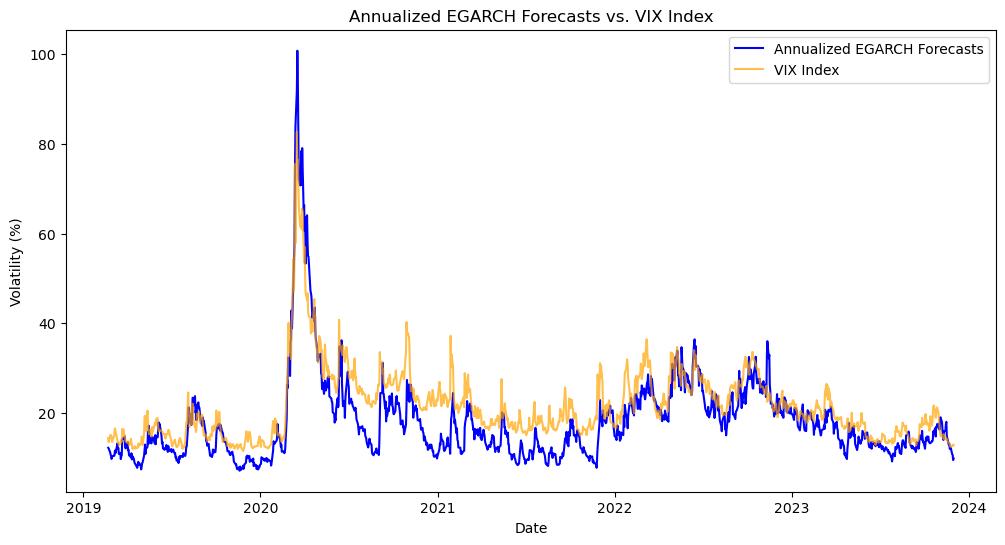

In [25]:
import matplotlib.pyplot as plt

# Plot the annualized EGARCH forecasts and the VIX data
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, annualized_forecasts, label='Annualized EGARCH Forecasts', color='blue')
plt.plot(test_data.index, vix_aligned, label='VIX Index', color='orange', alpha=0.7)

plt.title('Annualized EGARCH Forecasts vs. VIX Index')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.show()

In [37]:
position_size = 1000  # This can be adjusted

daily_vix_changes = vix_aligned.pct_change()

daily_pnl = []

for signal, vix_change in zip(strategy_signals, daily_vix_changes[1:]):
    if signal == 'Short':
        # PnL is positive if VIX increases (vix_change > 0)
        pnl = position_size * vix_change
    elif signal == 'Long':
        # PnL is positive if VIX decreases (vix_change < 0)
        pnl = -position_size * vix_change
    else:
        pnl = 0  # No position, no PnL
    daily_pnl.append(pnl)

total_pnl = sum(daily_pnl)

print(f"Total Simulated PnL: {total_pnl}")


Total Simulated PnL: 2928.833927378664


## Beta/Alpha

In [44]:
from scipy import stats
market_index_log_returns = sp500_data['Log_Returns']
# Ensure the dates in both datasets match
common_dates = test_data.index[1:].intersection(market_index_data.index)

# Filter both datasets to have common dates
aligned_index_log_returns = market_index_log_returns.loc[common_dates]
aligned_daily_returns = np.array([daily_pnl[i] for i, date in enumerate(test_data.index[1:]) if date in common_dates]) / position_size

# Make sure both series have the same length
if len(aligned_index_log_returns) == len(aligned_daily_returns):
    # Proceed with linear regression
    beta, alpha, _, _, _ = stats.linregress(aligned_index_log_returns, aligned_daily_returns)

    # Adjust Alpha for Risk-Free Rate
    risk_free_rate = 0.00  # Example risk-free rate
    alpha = alpha - risk_free_rate * (1 - beta)

    print(f"Beta: {beta:.2f}")
    print(f"Alpha: {alpha:.2f}%")
else:
    print(f"Error: Lengths of the datasets do not match. Market Index Returns: {len(aligned_index_log_returns)}, Strategy Returns: {len(aligned_daily_returns)}")

Beta: -3.43
Alpha: 0.00%


## Annualized Return Rate

In [43]:
import numpy as np
import pandas as pd

# Total PnL at the end of the period
total_pnl = 2928.833927378664

# Find the lowest point in the cumulative PnL if it starts from zero
lowest_pnl = min(0, min(cumulative_pnl))  # Assuming 'cumulative_pnl' is available

# Starting Value is set to the absolute value of the lowest cumulative PnL
starting_value = abs(lowest_pnl)

# Calculate the number of years in the backtesting period
start_date = pd.to_datetime('2000-01-01')
end_date = pd.to_datetime('2023-12-01')
years = (end_date - start_date).days / 365.25

# Calculate Annualized Return Rate (handling cases where starting value is zero)
if starting_value > 0:
    annual_return_rate = ((total_pnl + starting_value) / starting_value) ** (1 / years) - 1
else:
    # If starting value is zero, use average annual pnl as the return rate
    annual_return_rate = total_pnl / years / 1000  # Dividing by position size to normalize

print(f"Annualized Return Rate: {annual_return_rate * 100:.2f}%")

Annualized Return Rate: 14.56%


## Result over Time

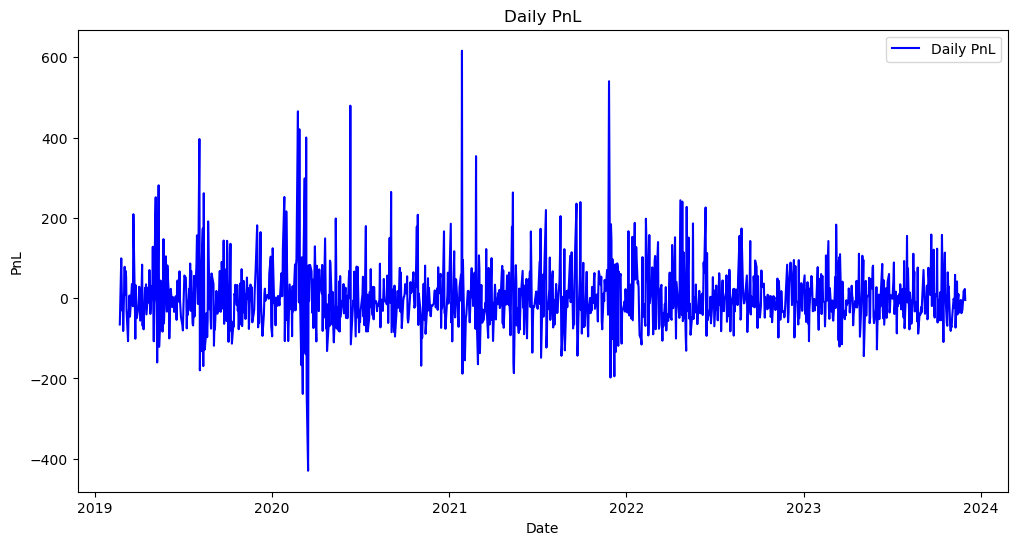

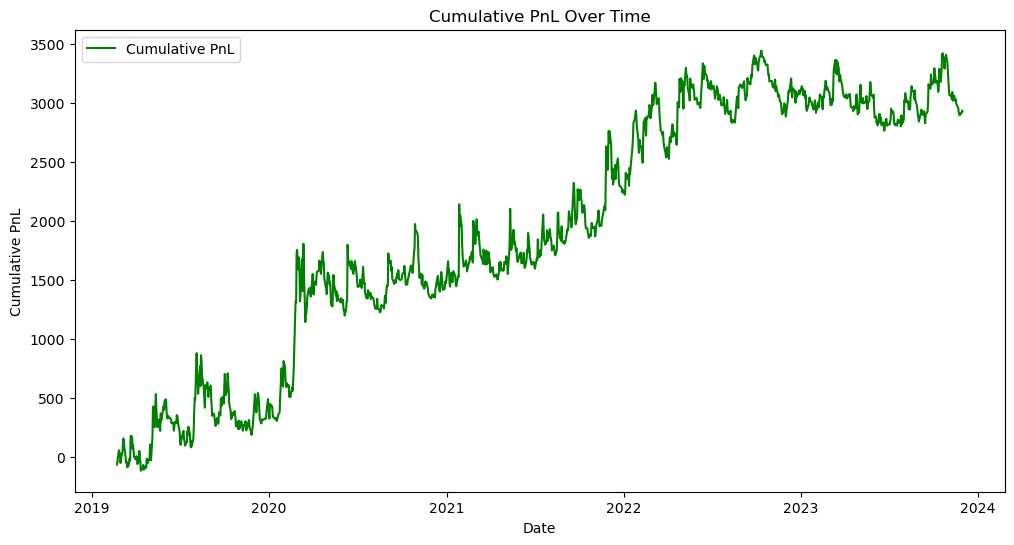

In [42]:
import matplotlib.pyplot as plt

# Calculate daily changes in VIX for PnL calculation
daily_vix_changes = vix_aligned.pct_change()

# Initialize PnL lists
daily_pnl = []
cumulative_pnl = []
cumulative_sum = 0

# Define a fixed position size for simplicity
position_size = 1000  # Adjust as needed

# Loop through each day in the test data
for signal, vix_change in zip(strategy_signals, daily_vix_changes[1:]):  # skip the first NaN change
    if signal == 'Short':
        pnl = position_size * vix_change
    elif signal == 'Long':
        pnl = -position_size * vix_change
    else:
        pnl = 0
    daily_pnl.append(pnl)
    cumulative_sum += pnl
    cumulative_pnl.append(cumulative_sum)

# Plot Daily PnL
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[1:], daily_pnl, label='Daily PnL', color='blue')
plt.title('Daily PnL')
plt.xlabel('Date')
plt.ylabel('PnL')
plt.legend()
plt.show()

# Plot Cumulative PnL
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[1:], cumulative_pnl, label='Cumulative PnL', color='green')
plt.title('Cumulative PnL Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.legend()
plt.show()


## Sharpe Ratio

In [38]:
# Convert daily PnL to returns (percentage)
daily_returns = np.array(daily_pnl) / position_size * 100

# Calculate mean and standard deviation of returns
mean_return = np.mean(daily_returns)
std_dev_return = np.std(daily_returns)

# Assuming a risk-free rate (annualized) - set to 0 if not considered
risk_free_rate = 0.00  # You can adjust this based on current risk-free rates

# Sharpe Ratio - Annualized (assuming there are 252 trading days in a year)
sharpe_ratio = (mean_return - risk_free_rate) / std_dev_return * np.sqrt(252)

print(f"Sharpe Ratio: {sharpe_ratio}")

Sharpe Ratio: 0.47467759200872056


## Transaction Costs

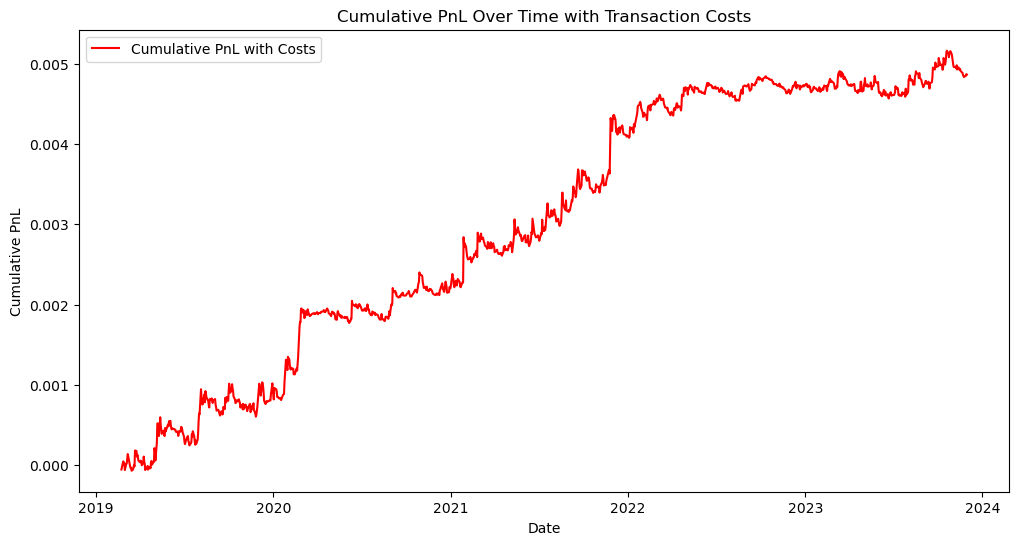

Total PnL with Transaction Costs: 0.004864028911741853


In [46]:
# Other imports and functions remain the same

# Define transaction cost
transaction_cost_bps = 0.05  # 5 basis points
transaction_cost_factor = transaction_cost_bps / 100  # Convert to percentage

def calculate_pnl_with_costs(strategy_signals, position_sizes, vix_changes, transaction_cost_factor):
    daily_pnl = []
    previous_signal = None

    for i, ((signal, size), vix_change) in enumerate(zip(strategy_signals, vix_changes[1:])):
        # Calculate PnL
        if signal == 'Short':
            pnl = size * vix_change
        elif signal == 'Long':
            pnl = -size * vix_change
        else:
            pnl = 0

        # Apply transaction costs when the signal changes
        if signal != previous_signal and i != 0:  # Ignore the first transaction
            pnl -= transaction_cost_factor * size  # Deduct transaction cost

        daily_pnl.append(pnl)
        previous_signal = signal

    return daily_pnl

# Calculate daily pnl including transaction costs
daily_pnl_with_costs = calculate_pnl_with_costs(final_strategy, position_sizes, vix_aligned.pct_change(), transaction_cost_factor)

# Calculate total and cumulative PnL
total_pnl_with_costs = sum(daily_pnl_with_costs)
cumulative_pnl_with_costs = np.cumsum(daily_pnl_with_costs)

# Plotting Cumulative PnL with Costs
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[1:], cumulative_pnl_with_costs, label='Cumulative PnL with Costs', color='red')
plt.title('Cumulative PnL Over Time with Transaction Costs')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.legend()
plt.show()

print(f"Total PnL with Transaction Costs: {total_pnl_with_costs}")
